In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

/home/nlarusstone/.virtualenvs/nls/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import cobra
%load_ext autoreload
import sys
if not '/home/nlarusstone/cf_fba' in sys.path:
    sys.path.append('/home/nlarusstone/cf_fba')
import src.utils as utils
import src.flux_sample as fs
import src.create_dataset as dataset
from src.get_test_data import get_test_data
import src.cf_io as cf_io
import src.plotting as plotting
%autoreload 2

In [5]:
latent_dim = 2
use_corr = True
froot = 'hand'
txtl = True
resamp = True
layer_szs = [1024, 1024, 1024]

In [6]:
encoder, generator, X_test, y_test, obj_col, cols, y_vals_d, test_enc, test_dec = cf_io.get_test_data(
    froot, txtl, resamp, latent_dim, layer_szs, use_corr=True)

Load models ../models/encoder_epochs=200_batch=256_dimension=2_corr=True_scale=flux_zero_froot=hand_txtl=True_nlayers=3_resamp=True_lastlayer=1024.h5


/home/nlarusstone/.virtualenvs/nls/lib/python2.7/site-packages/keras/models.py:282 UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.


Read in data from ../data/hand_txtl_stacked_fluxes
Encoded data
Decoded data


In [73]:
latent_dim = 10
encoder_l, generator_l, X_test_l, y_test_l, obj_col_l, cols_l, y_vals_d_l, test_enc_l, test_dec_l = cf_io.get_test_data(
    froot, txtl, resamp, latent_dim, layer_szs, use_corr=True)

Load models ../models/encoder_epochs=200_batch=256_dimension=10_corr=True_scale=flux_zero_froot=hand_txtl=True_nlayers=3_resamp=True_lastlayer=1024.h5
Read in data from ../data/hand_txtl_stacked_fluxes
Encoded data
Decoded data


In [126]:
df = cf_io.get_exp_data('manual')
df.drop('level_0', axis=1, inplace=True)
df.head()

(1591, 38)


,mdx,pi,nts,k,OUT
index,,,,,
0,0.0,0.0,1.0,0.0,0.566331
1,0.0,1.0,0.0,0.0,0.523761
2,1.0,0.0,0.0,0.0,0.589774
3,0.0,0.5,0.5,0.0,0.969988
4,0.5,0.0,0.5,0.0,0.758090


Plot d_1 vs d_2
Plot d_1 vs d_2


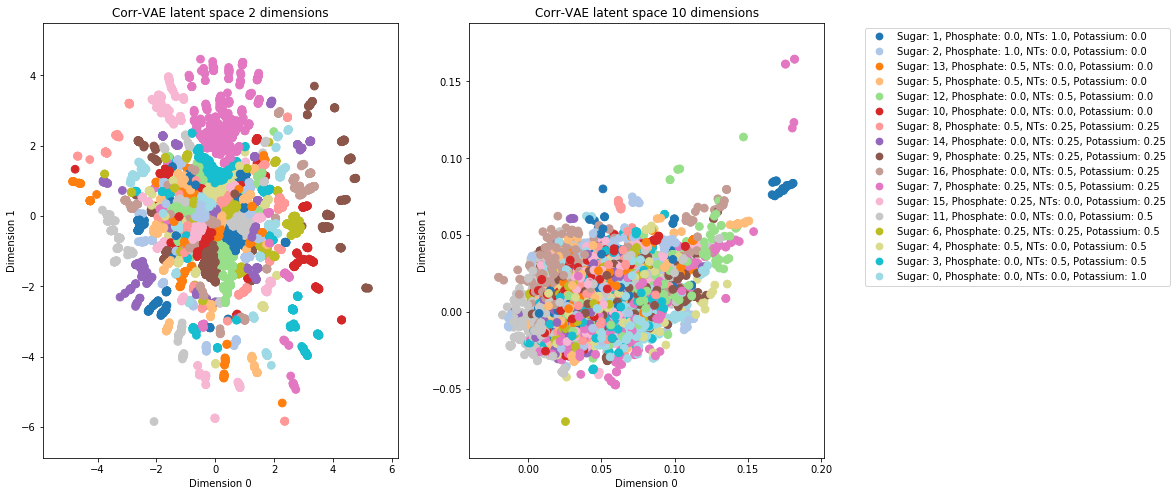

In [84]:
axarr = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))[1]
plotting.plt_latent_space(test_enc, df, axarr[0], samp_range=(0, 1000), legend=False)
axarr[0].set_title('Corr-VAE latent space 2 dimensions')
plotting.plt_latent_space(test_enc_l, df, axarr[1], dim_1=0, dim_2=samp_range=(0, 1000), legend=True)
axarr[1].set_title('Corr-VAE latent space 10 dimensions')
plt.show()

In [91]:
test_enc_l.shape

(12500, 17, 10)

In [93]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=True)

In [98]:
test_enc_l.shape

(12500, 17, 10)

In [99]:
test_enc_sm = test_enc_l[0:1000, :, :]

In [102]:
test_enc_l_2d = test_enc_sm.reshape(test_enc_sm.shape[0] * test_enc_l.shape[1], test_enc_l.shape[2])
test_enc_l_2d.shape

(17000, 10)

In [103]:
tsne_enc_l = tsne.fit_transform(test_enc_l_2d)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17000 samples in 0.071s...
[t-SNE] Computed neighbors for 17000 samples in 1.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17000
[t-SNE] Computed conditional probabilities for sample 2000 / 17000
[t-SNE] Computed conditional probabilities for sample 3000 / 17000
[t-SNE] Computed conditional probabilities for sample 4000 / 17000
[t-SNE] Computed conditional probabilities for sample 5000 / 17000
[t-SNE] Computed conditional probabilities for sample 6000 / 17000
[t-SNE] Computed conditional probabilities for sample 7000 / 17000
[t-SNE] Computed conditional probabilities for sample 8000 / 17000
[t-SNE] Computed conditional probabilities for sample 9000 / 17000
[t-SNE] Computed conditional probabilities for sample 10000 / 17000
[t-SNE] Computed conditional probabilities for sample 11000 / 17000
[t-SNE] Computed conditional probabilities for sample 12000 / 17000
[t-SNE] Computed conditional probabilities for sam

In [119]:
tsne_enc_l.shape

(17000, 2)

In [120]:
col = np.array(range(17) * (tsne_enc_l.shape[0] / 17))

Plot d_1 vs d_2


Text(0.5,1,'tSNE projection of 10-dimensional Corr-VAE latent space')

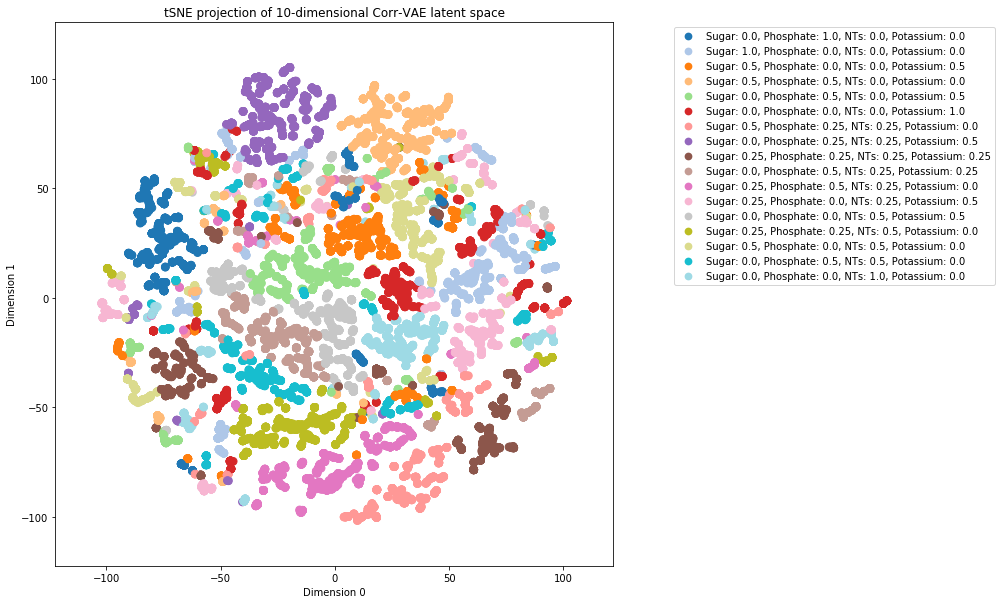

In [128]:
plotting.plt_latent_space(tsne_enc_l, df, None, flat=True, y_test=col, dim_1=0, dim_2=1, legend=True)
plt.title('tSNE projection of 10-dimensional Corr-VAE latent space')

Plot d_1 vs d_2


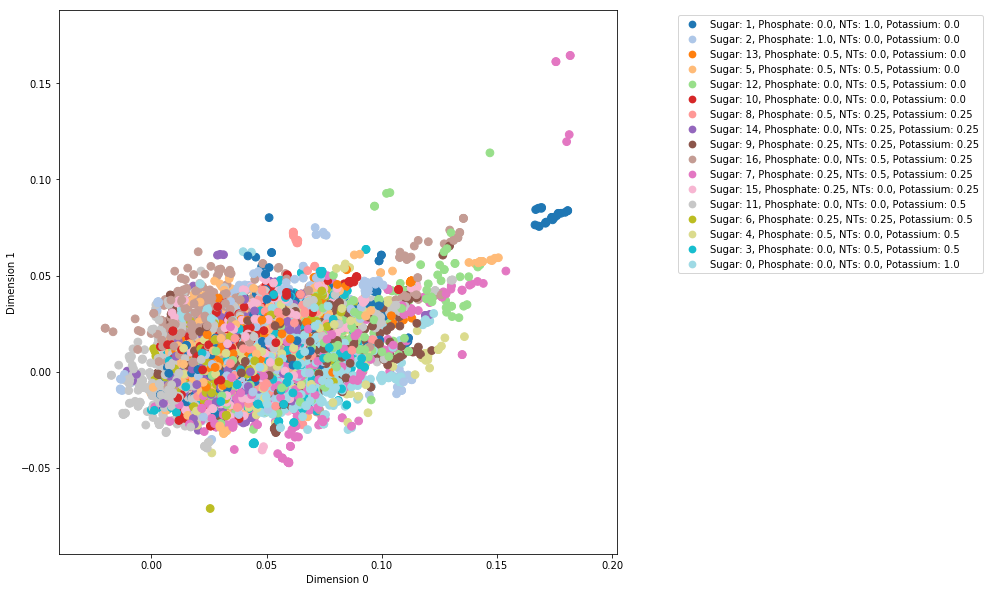

Plot d_1 vs d_2


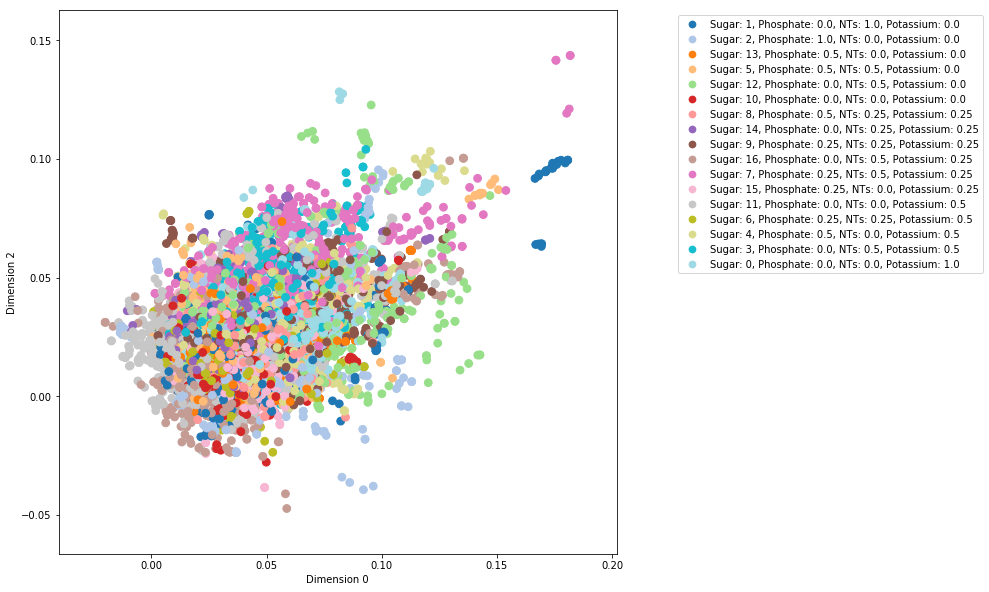

Plot d_1 vs d_2


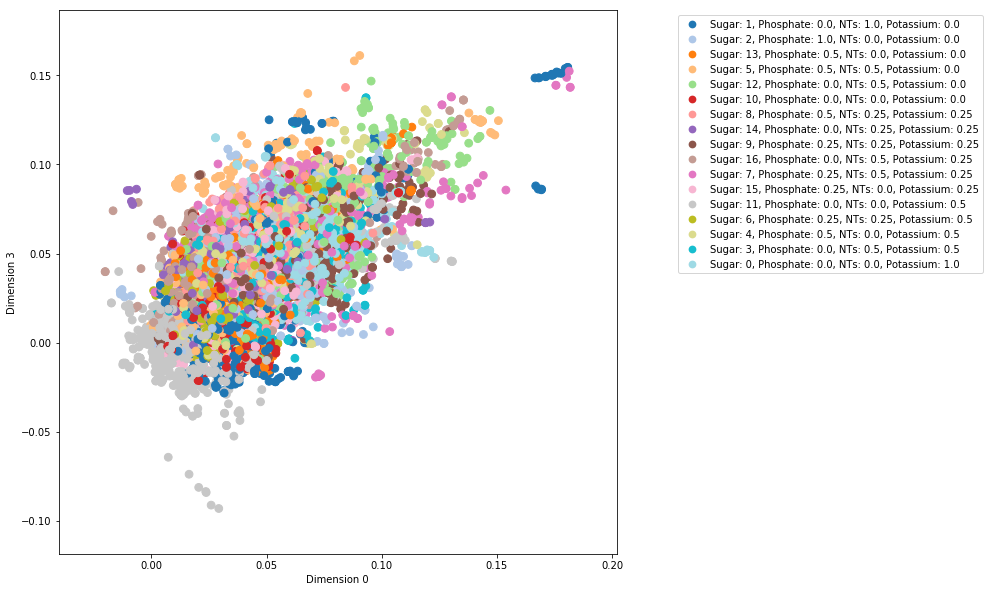

Plot d_1 vs d_2


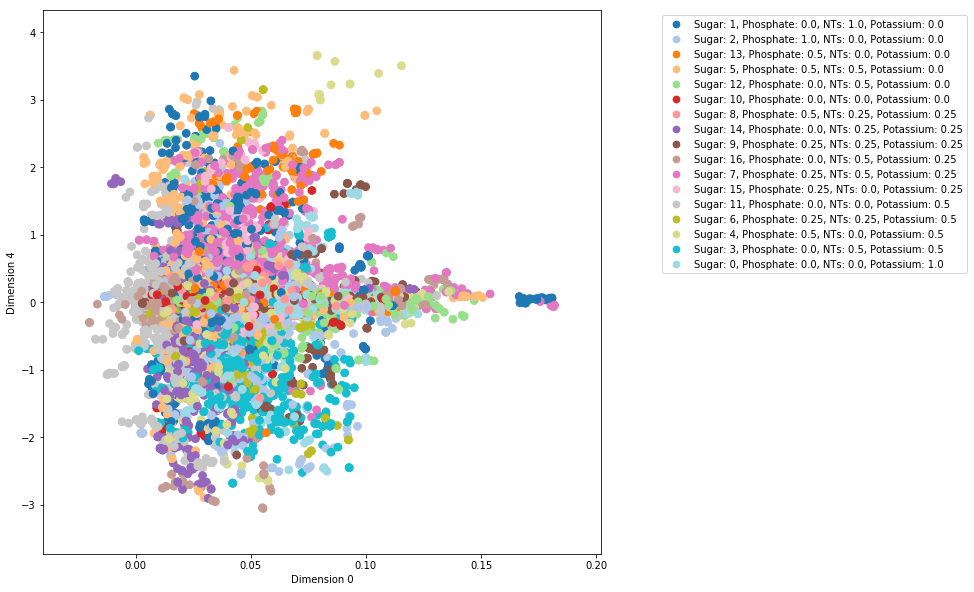

Plot d_1 vs d_2


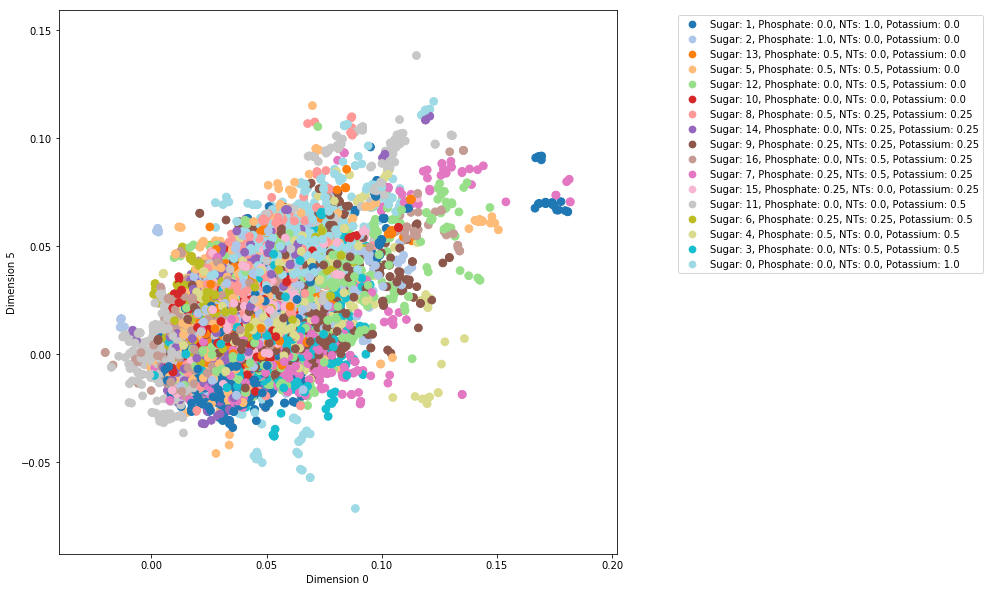

Plot d_1 vs d_2


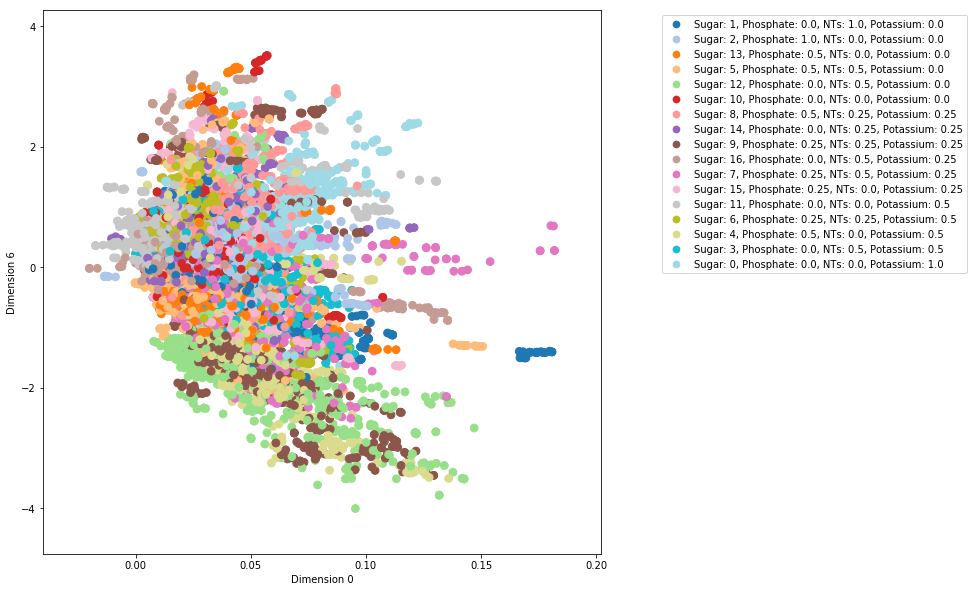

Plot d_1 vs d_2


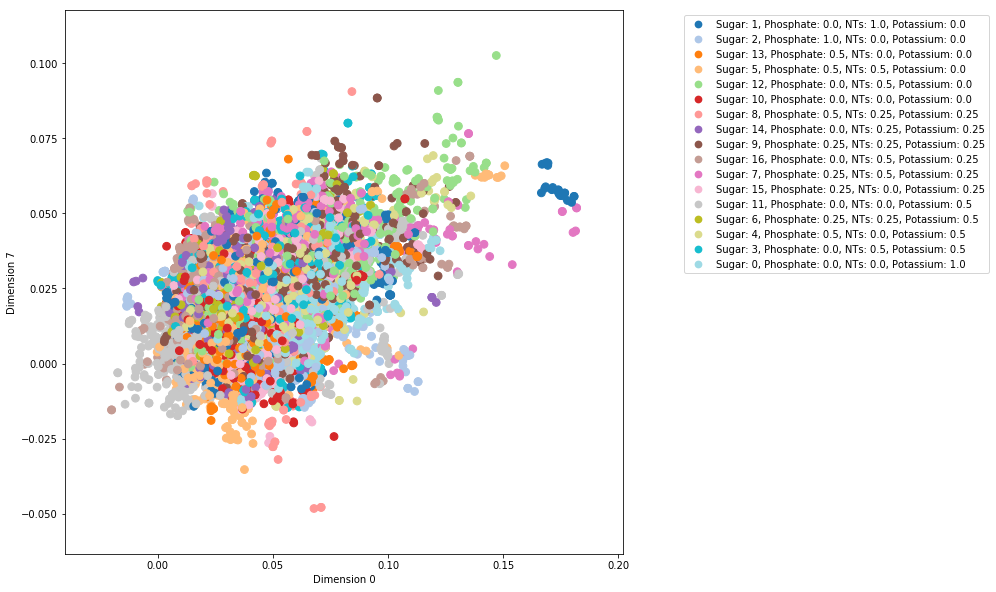

Plot d_1 vs d_2


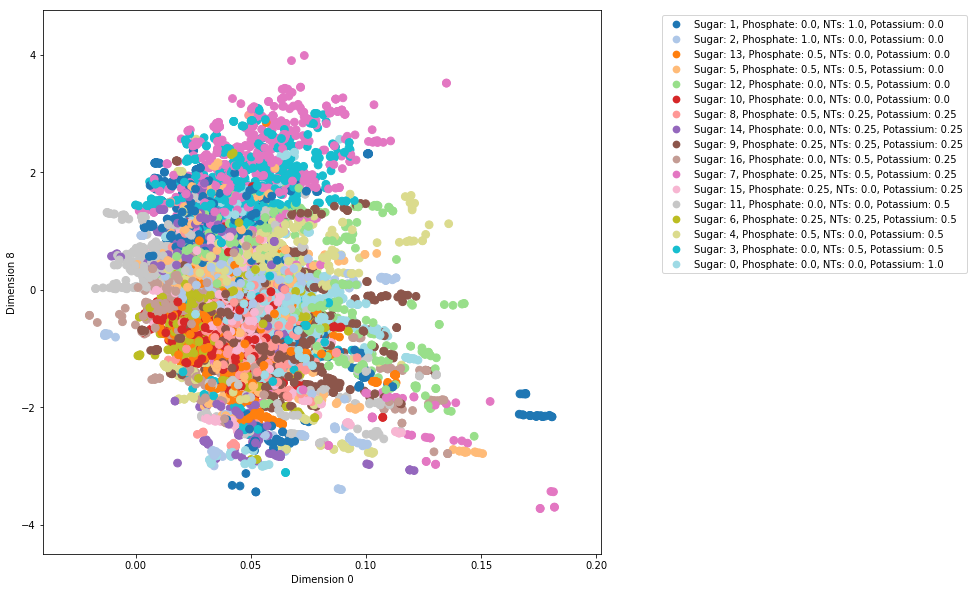

Plot d_1 vs d_2


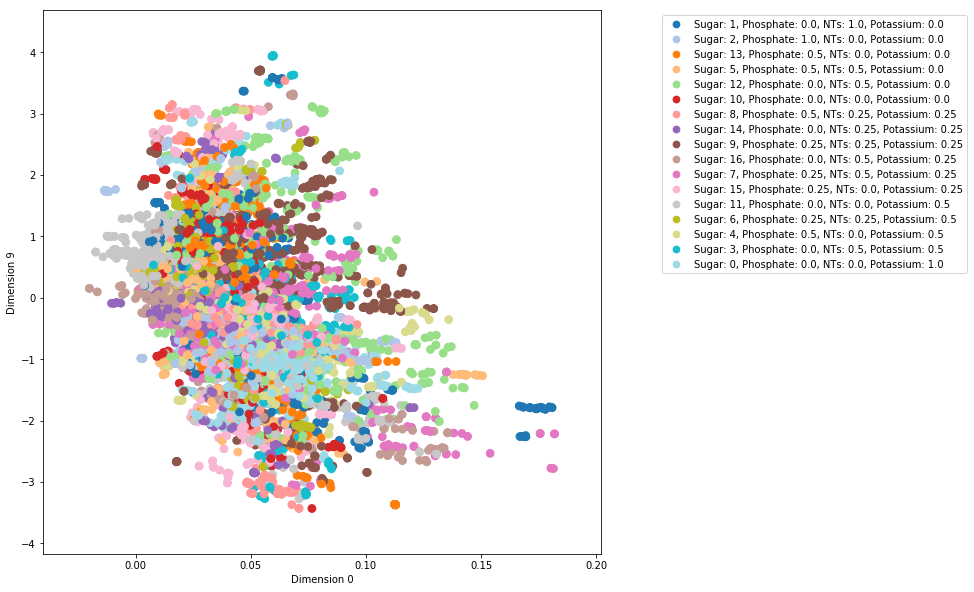

In [90]:
for i in range(1, 10):
    plotting.plt_latent_space(test_enc_l, df, None, dim_1=0, dim_2=i, samp_range=(0, 1000), legend=True)
    plt.show()

In [2]:
stds.shape

NameError: name 'stds' is not defined

In [7]:
stds = X_test.std(axis=0).mean(axis=0)
recon_stds = test_dec.std(axis=0).mean(axis=0)
rxn_nums = range(X_test.shape[-1])

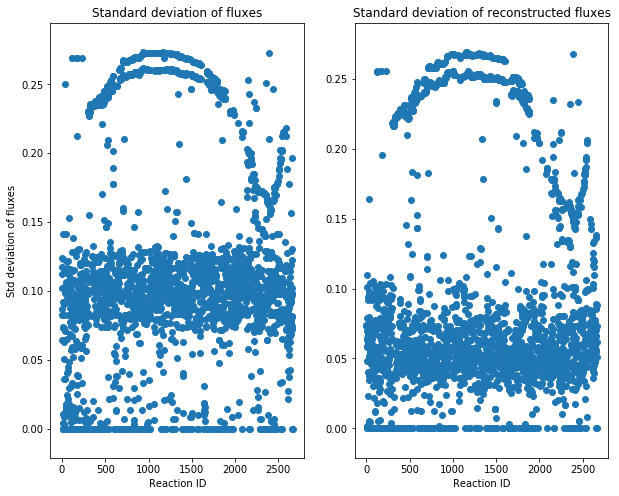

In [13]:
def plt_stds(rxns, stds, recon, ax=None, last=False):
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    ax.scatter(rxns, stds)
    if not last:
        ax.set_ylabel('Std deviation of fluxes')
    ax.set_xlabel('Reaction ID')
    ax.set_title('Standard deviation of {0}fluxes'.format('reconstructed ' if recon else ''))
    #plt.show()
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
plt_stds(rxn_nums, stds, recon=False, ax=axarr[0])
plt_stds(rxn_nums, recon_stds, recon=True, ax=axarr[1], last=True)
plt.show()

In [ ]:
def pred(biased_resamp_data, enc, gen):
    encoded_biased = enc.predict(biased_resamp_data)
    decoded_biased = gen.predict(encoded_biased)
    return check_corr(decoded_biased, df, btol_col)
pred(biased_resamp_data, enc, gen)
pred(biased_resamp_data, enc2, gen2)

In [ ]:
def add_noise(biased_resamp_data, enc, gen):
    noise_arr = np.logspace(start=-5, stop=1, num=10)
    corrs = []
    for noise in noise_arr:
        noisy_data = biased_resamp_data.copy()
        for i in range(n_experiments):
            s = noisy_data[:, i, :].shape
            noisy_data[:, i, :] += np.random.normal(scale=noise, size=s)
            #noisy_data[:, i, :] = minmax_scale(noisy_data[:, i, :])
        #scaled_noisy_data = scale_by_flux(noisy_data)
        corr = pred(noisy_data, enc, gen)
        corrs.append(corr)
    return zip(noise_arr, corrs) + [(0, pred(biased_resamp_data, enc, gen))]
noise_res = add_noise(biased_resamp_data, enc, gen)
noise_res2 = add_noise(biased_resamp_data, enc_good, gen_good)
noise_res3 = add_noise(biased_resamp_data, enc_bad, gen_bad)

In [ ]:
orig_corr = check_corr(biased_resamp_data, df, btol_col)
def plt_noise_corr(noise_data, orig_corr, ndim=2):
    orig_enc, noise_data = noise_data[-1], noise_data[:-1]
    plt.figure(figsize=(10, 8))
    plt.title('Latent dimension = {0}'.format(ndim))
    plt.axhline(y=-1 * orig_enc[1] if orig_enc[1] < 0 else orig_enc[1], label='Original data encoded')
    plt.axhline(y=orig_corr, label='Original data correlation', c='g')
    for noise, corr in noise_data:
        plt.scatter(x=noise, y=-1 * corr if corr < 0 else corr)
        plt.xlabel('Noise amount')
        plt.ylabel('Correlation')
    plt.xscale('log')
    plt.legend()
    plt.show()
plt_noise_corr(noise_res, orig_corr, ndim=2)
#plt_noise_corr(noise_res2, orig_corr, ndim=10)
#plt_noise_corr(noise_res3, orig_corr, ndim='2, no correlation loss')